##**HOG Features**

In [1]:
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import data, exposure, io
import cv2

In [2]:
!pip install face-recognition

In [3]:
cd /content/drive/My Drive/face/

/content/drive/My Drive/face


In [4]:
image = cv2.imread("/content/drive/My Drive/face/billgates1.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

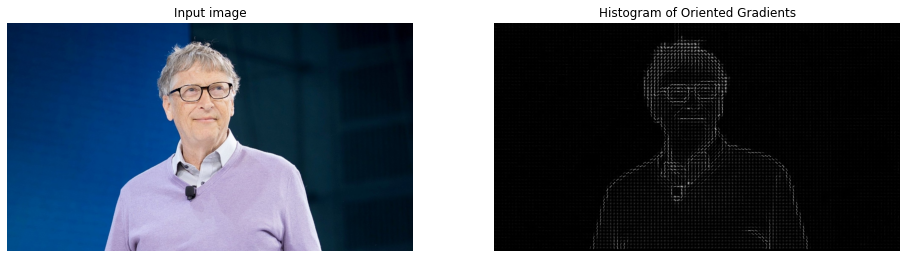

In [5]:
# fd is feature descriptor
fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16), 
                    cells_per_block=(1, 1), block_norm='L2-Hys', visualize=True, multichannel=True)

# plot the image and hog image
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 8), sharex=True, sharey=True)

ax1.axis("off")
ax1.imshow(image, cmap = plt.cm.gray)
ax1.set_title("Input image")

# rescale the histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range = (0, 10))

ax2.axis("off")
ax2.imshow(hog_image_rescaled, cmap = plt.cm.gray)
ax2.set_title("Histogram of Oriented Gradients")
plt.show()

In [6]:
print(len(fd))
print(image.shape)

64320
(1080, 1920, 3)


##**Face Detection**

In [7]:
import face_recognition

from matplotlib.patches import Rectangle, Circle
import numpy as np
%matplotlib inline

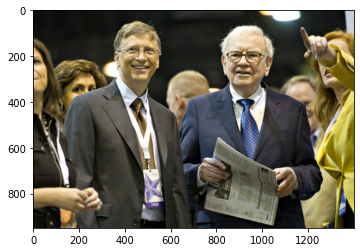

In [8]:
# load image into numpy array
image1 = cv2.imread("/content/drive/My Drive/face/billwarren1.jpg")
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
plt.imshow(image1)

In [9]:
# find all faces in the image

face_locations = face_recognition.face_locations(image1)
number_of_faces = len(face_locations)
print("{} face(s) found in the image".format(number_of_faces))

2 face(s) found in the image


A face is located at pixel location top: 820, left: 139, bottom: 1005, right: 325
A face is located at pixel location top: 390, left: 133, bottom: 545, right: 288


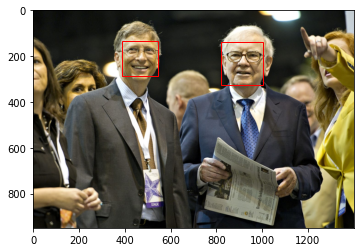

In [10]:
# get axis handle

plt.imshow(image1)
ax = plt.gca()

# repeat for all faces found
for face_location in face_locations:

  # print the location of each face in the image. (top, right, bottom, left)
  top, right, bottom, left = face_location
  x, y, w, h = left, top, right, bottom
  print("A face is located at pixel location top: {}, left: {}, bottom: {}, right: {}".format(x, y, w, h))

  # draw a rectangle on the face
  rect = Rectangle((x, y), w-x, h-y, color = "red", fill = False)
  ax.add_patch(rect)

# show output image
plt.show()

##**Face Recognition**

In [11]:
# load the known image and create a database

image = cv2.imread("/content/drive/My Drive/face/billgates1.jpg")
billgates = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image = cv2.imread("/content/drive/My Drive/face/melinda1.jpg")
melinda = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image = cv2.imread("/content/drive/My Drive/face/mark1.jpg")
mark = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [12]:
# get the face encoding of each person

bill_encoding = face_recognition.face_encodings(billgates)[0]
melinda_encoding = face_recognition.face_encodings(melinda)[0]
mark_encoding = face_recognition.face_encodings(mark)[0]

known_face_encodings = [bill_encoding, melinda_encoding, mark_encoding]

##**Test with Unknown Image 1**

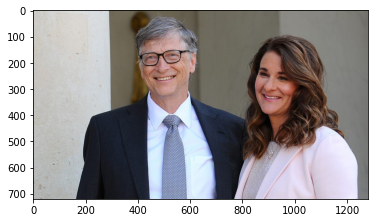

In [13]:
# load an unknown image

unknown_image = cv2.imread("/content/drive/My Drive/face/billmelinda1.jpg")
unknown_image = cv2.cvtColor(unknown_image, cv2.COLOR_BGR2RGB)
plt.imshow(unknown_image)

# get the face encodings of any people in the picture

unknown_face_encodings = face_recognition.face_encodings(unknown_image)

In [14]:
from scipy.spatial import distance

# there might be more than 1 person hence we are looping
for unknown_face_encoding in unknown_face_encodings:

  # test with the people have in the database
  results = []
  for known_face_encoding in known_face_encodings:
    
    d = distance.euclidean(known_face_encoding, unknown_face_encoding)
    results.append(d)

  threshold = 0.6
  results = np.array(results) <= threshold

  name = "unknown"

  if(results[0]):
    name = "Bill Gates Image"
  elif(results[1]):
    name = "Melinda Gates Image"
  elif(results[2]):
    name = "Mark Zuckerberg Image"

  print("Found {} in the photo".format(name))

Found Melinda Gates Image in the photo
Found Bill Gates Image in the photo


##**Test with Unknown Image 2**

AxesImage(54,36;334.8x217.44)


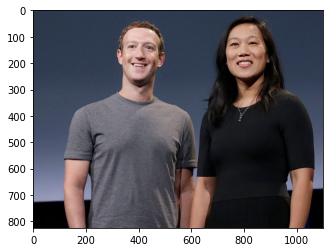

In [15]:
# load an unknown image

unknown_image = cv2.imread("/content/drive/My Drive/face/mark2.jpg")
unknown_image = cv2.cvtColor(unknown_image, cv2.COLOR_BGR2RGB)
print(plt.imshow(unknown_image))

In [16]:
# get the face encodings of any people in the picture

unknown_face_encodings = face_recognition.face_encodings(unknown_image)

from scipy.spatial import distance

# there might be more than 1 person hence we are looping
for unknown_face_encoding in unknown_face_encodings:

  # test with the people have in the database
  results = []
  for known_face_encoding in known_face_encodings:
    
    d = distance.euclidean(known_face_encoding, unknown_face_encoding)
    results.append(d)

  threshold = 0.6
  results = np.array(results) <= threshold

  name = "unknown"

  if(results[0]):
    name = "Bill Gates Image"
  elif(results[1]):
    name = "Melinda Gates Image"
  elif(results[2]):
    name = "Mark Zuckerberg Image"

  print("Found {} in the photo".format(name))

Found unknown in the photo
Found Mark Zuckerberg Image in the photo


##**Test with Unknown Image 3**

AxesImage(54,36;334.8x217.44)


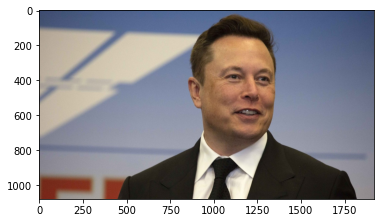

In [17]:
# load an unknown image

unknown_image = cv2.imread("/content/drive/My Drive/face/elon1.jpg")
unknown_image = cv2.cvtColor(unknown_image, cv2.COLOR_BGR2RGB)
print(plt.imshow(unknown_image))

In [18]:
# get the face encodings of any people in the picture

unknown_face_encodings = face_recognition.face_encodings(unknown_image)

from scipy.spatial import distance

# there might be more than 1 person hence we are looping
for unknown_face_encoding in unknown_face_encodings:

  # test with the people have in the database
  results = []
  for known_face_encoding in known_face_encodings:
    
    d = distance.euclidean(known_face_encoding, unknown_face_encoding)
    results.append(d)

  threshold = 0.6
  results = np.array(results) <= threshold

  name = "unknown"

  if(results[0]):
    name = "Bill Gates Image"
  elif(results[1]):
    name = "Melinda Gates Image"
  elif(results[2]):
    name = "Mark Zuckerberg Image"

  print("Found {} in the photo".format(name))

Found unknown in the photo


##**Test with Unknown Image 4**


AxesImage(54,36;334.8x217.44)


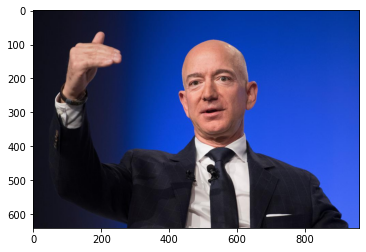

In [19]:
# load an unknown image

unknown_image = cv2.imread("/content/drive/My Drive/face/jeff1.jpg")
unknown_image = cv2.cvtColor(unknown_image, cv2.COLOR_BGR2RGB)
print(plt.imshow(unknown_image))

In [20]:
# get the face encodings of any people in the picture

unknown_face_encodings = face_recognition.face_encodings(unknown_image)

from scipy.spatial import distance

# there might be more than 1 person hence we are looping
for unknown_face_encoding in unknown_face_encodings:

  # test with the people have in the database
  results = []
  for known_face_encoding in known_face_encodings:
    
    d = distance.euclidean(known_face_encoding, unknown_face_encoding)
    results.append(d)

  threshold = 0.6
  results = np.array(results) <= threshold

  name = "unknown"

  if(results[0]):
    name = "Bill Gates Image"
  elif(results[1]):
    name = "Melinda Gates Image"
  elif(results[2]):
    name = "Mark Zuckerberg Image"

  print("Found {} in the photo".format(name))

Found unknown in the photo


##**Test with Unknown Image 5**

AxesImage(54,36;334.8x217.44)


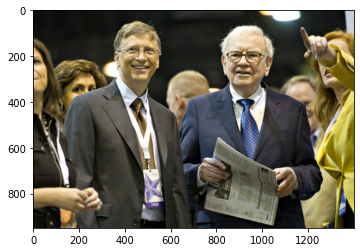

In [21]:
# load an unknown image

unknown_image = cv2.imread("/content/drive/My Drive/face/billwarren1.jpg")
unknown_image = cv2.cvtColor(unknown_image, cv2.COLOR_BGR2RGB)
print(plt.imshow(unknown_image))

In [22]:
# get the face encodings of any people in the picture

unknown_face_encodings = face_recognition.face_encodings(unknown_image)

from scipy.spatial import distance

# there might be more than 1 person hence we are looping
for unknown_face_encoding in unknown_face_encodings:

  # test with the people have in the database
  results = []
  for known_face_encoding in known_face_encodings:
    
    d = distance.euclidean(known_face_encoding, unknown_face_encoding)
    results.append(d)

  threshold = 0.6
  results = np.array(results) <= threshold

  name = "unknown"

  if(results[0]):
    name = "Bill Gates Image"
  elif(results[1]):
    name = "Melinda Gates Image"
  elif(results[2]):
    name = "Mark Zuckerberg Image"

  print("Found {} in the photo".format(name))

Found unknown in the photo
Found Bill Gates Image in the photo
